<a href="https://colab.research.google.com/github/alzdor/mashine_learning/blob/master/projectZNO_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2019.7z
!7z e zno_2019.7z

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.4M  100 27.4M    0     0  42.0M      0 --:--:-- --:--:-- --:--:-- 42.0M

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 28819887 bytes (28 MiB)

Extracting archive: zno_2019.7z
--
Path = zno_2019.7z
Type = 7z
Physical Size = 28819887
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      5% - zno_2019.csv                    10% - zno_2019.csv                    16% - zno_2019.csv                    20% - zno_2019.csv                   

In [2]:
import pandas as pd 
import numpy as np 

data2019 = pd.read_csv("zno_2019.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (100,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data2019.head()

In [3]:
#program calculates the dependence of mean mark in Ukrainian upon different regions, 
#the dependence of number of people that were absent at the exam upon regions and
#at the end plots these two dependencies on the same plot to find out if there is any "correlation" between them
oblast = data2019.REGNAME.unique()
#create an empty Data frame for mean values in different regions
dataUkrObl2019 = pd.DataFrame()
#go along all regions
for oblastCurr in oblast:
  #choose rows corresponding to the current region
  dataOblCurr = data2019.loc[data2019['REGNAME'] == oblastCurr]
  #calculate total number of people who were tested in certain region
  totalNumPeopleCurr = data2019['REGNAME'].value_counts()[oblastCurr]
  #calculate number of non-appearence
  nonAppearenceCurr = dataOblCurr['UkrTestStatus'].value_counts()["Не з’явився"]
  #calculate percent of abscent people
  percentAbsent = nonAppearenceCurr / totalNumPeopleCurr * 100
  #replace NaN and 0 values to 100
  dataOblCurr['UkrBall100'].replace([np.nan, 0.0], value =100, inplace=True)
  #calculate mean mark in Ukrainian
  meanMarkUkrOblCurr = dataOblCurr.loc[:,"UkrBall100"].mean()
  #add new row with another region every loop cycle
  dataUkrObl2019 = dataUkrObl2019.append({'Область':oblastCurr, 'Середній бал':meanMarkUkrOblCurr, 'Відсоток неявок':percentAbsent}, ignore_index=True)
#place columns in an appropriate order
columnsTitles=['Область','Середній бал','Відсоток неявок']
dataUkrObl2019=dataUkrObl2019.reindex(columns=columnsTitles)

#dataOblCurr
dataUkrObl2019

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Область,Середній бал,Відсоток неявок
0,Запорізька область,131.188542,3.328557
1,Донецька область,130.627798,3.682607
2,Тернопільська область,132.571043,2.054596
3,Рівненська область,130.477517,1.417940
4,Кіровоградська область,131.961376,3.027660
5,Закарпатська область,123.006426,1.602538
6,м.Київ,141.590093,3.562678
7,Хмельницька область,132.669874,2.001546
8,Дніпропетровська область,131.670078,3.827359
9,Харківська область,136.955207,3.137128


Text(0, 0.5, 'Середній бал')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


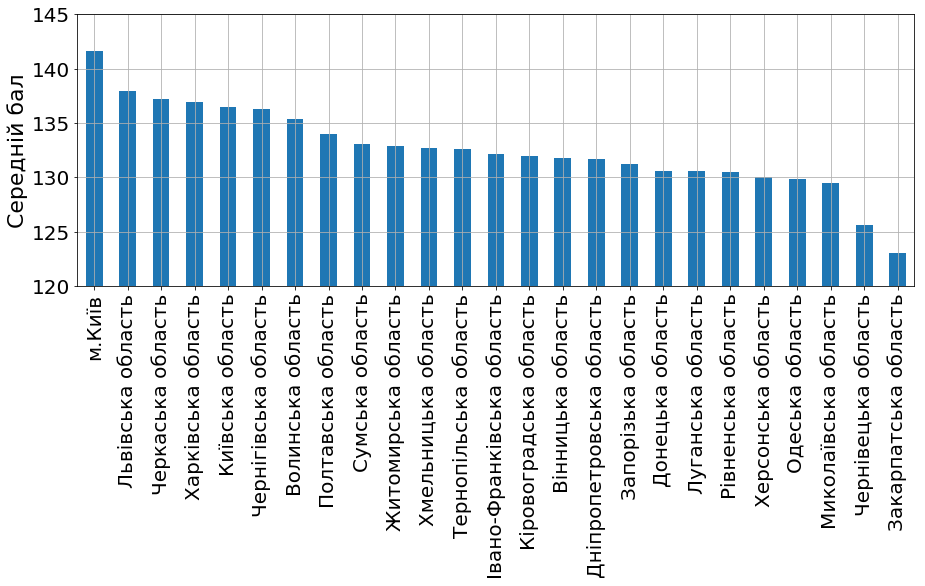

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'size'   : 22,
        'family' : 'normal',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
#sort
dataUkrObl2019 = dataUkrObl2019.sort_values('Середній бал', ascending=False)
distrib2019 = dataUkrObl2019.plot.bar( x='Область', y='Середній бал', rot=90,legend=False, width=0.5,figsize=(15,5))

#distrib = meanMarkUkrObl.plot( x='Область', y='Середній бал Укр мова', rot=90, kind='bar',legend=False)
distrib2019.grid(zorder=0)
plt.ylim(120, 145)
distrib2019.set_xlabel("")
distrib2019.set_ylabel("Середній бал")

Text(0, 0.5, 'Середній бал')

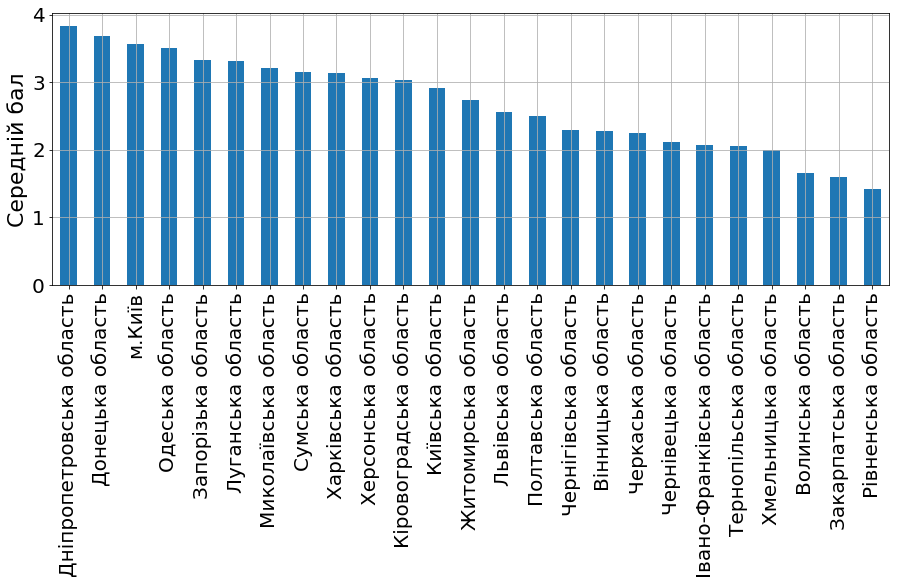

In [5]:
dataUkrObl2019_absent_sorted = dataUkrObl2019.sort_values('Відсоток неявок', ascending=False)
distribAbsent2019 = dataUkrObl2019_absent_sorted.plot.bar( x='Область', y='Відсоток неявок', rot=90,legend=False, width=0.5,figsize=(15,5))

distribAbsent2019.grid(zorder=0)
distribAbsent2019.set_xlabel("")
distribAbsent2019.set_ylabel("Середній бал")

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


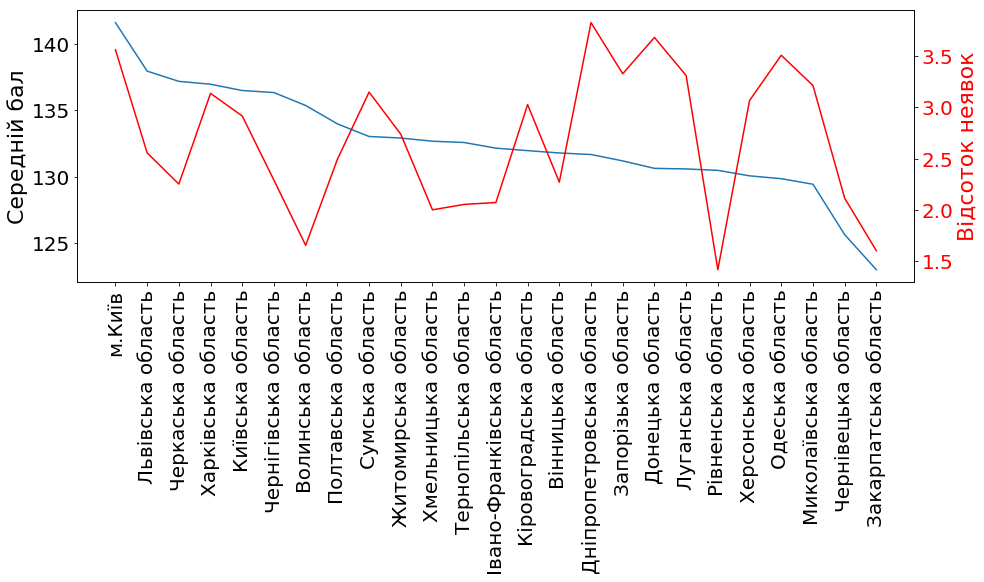

In [6]:
#display correlation between distributions of mean marks and percent of absent people
import numpy
import matplotlib.pyplot as plt
#change size of figures

x = dataUkrObl2019.loc[:,'Область']
y1 = dataUkrObl2019.loc[:,'Середній бал']
y2 = dataUkrObl2019.loc[:,'Відсоток неявок']

fig = plt.figure(figsize=(15,5))

plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Середній бал')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Відсоток неявок', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
